In [34]:
#Import modules.
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set()

# Importing files

In [35]:
#Link to dataset, I didn´t bought it because I wanted only the total and it was very expensive, so I typed what I needed ;) 
#Link https://www.statista.com/statistics/875319/number-flights-brazil/

total = pd.read_csv('Total_flights.csv')
total.set_index('Ano',inplace=True)

In [36]:
flightsT = pd.read_csv('BrFlights2.csv', encoding='latin1')

In [37]:
avi = pd.read_csv('accidents.csv')
avi1 = pd.DataFrame(avi)

# Wranggling stuff

In [38]:
flightsT.head()

,Voos,Companhia.Aerea,Codigo.Tipo.Linha,Partida.Prevista,Partida.Real,Chegada.Prevista,Chegada.Real,Situacao.Voo,Codigo.Justificativa,Aeroporto.Origem,...,Estado.Origem,Pais.Origem,Aeroporto.Destino,Cidade.Destino,Estado.Destino,Pais.Destino,LongDest,LatDest,LongOrig,LatOrig
0,AAL - 203,AMERICAN AIRLINES INC,Internacional,2016-01-30T08:58:00Z,2016-01-30T08:58:00Z,2016-01-30T10:35:00Z,2016-01-30T10:35:00Z,Realizado,NaN,Afonso Pena,...,PR,Brasil,Salgado Filho,Porto Alegre,RS,Brasil,-51.175381,-29.993473,-49.172481,-25.532713
1,AAL - 203,AMERICAN AIRLINES INC,Internacional,2016-01-13T12:13:00Z,2016-01-13T12:13:00Z,2016-01-13T21:30:00Z,2016-01-13T21:30:00Z,Realizado,NaN,Salgado Filho,...,RS,Brasil,Miami,Miami,N/I,Estados Unidos,-80.287046,25.795865,-51.175381,-29.993473
2,AAL - 203,AMERICAN AIRLINES INC,Internacional,2016-01-29T12:13:00Z,2016-01-29T12:13:00Z,2016-01-29T21:30:00Z,2016-01-29T21:30:00Z,Realizado,NaN,Salgado Filho,...,RS,Brasil,Miami,Miami,N/I,Estados Unidos,-80.287046,25.795865,-51.175381,-29.993473
3,AAL - 203,AMERICAN AIRLINES INC,Internacional,2016-01-19T12:13:00Z,2016-01-18T12:03:00Z,2016-01-19T21:30:00Z,2016-01-18T20:41:00Z,Realizado,LIBERACAO SERV. TRAFEGO AEREO/ANTECIPACAO,Salgado Filho,...,RS,Brasil,Miami,Miami,N/I,Estados Unidos,-80.287046,25.795865,-51.175381,-29.993473
4,AAL - 203,AMERICAN AIRLINES INC,Internacional,2016-01-30T12:13:00Z,2016-01-30T12:13:00Z,2016-01-30T21:30:00Z,2016-01-30T21:30:00Z,Realizado,NaN,Salgado Filho,...,RS,Brasil,Miami,Miami,N/I,Estados Unidos,-80.287046,25.795865,-51.175381,-29.993473


In [39]:
flightsT.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2542519 entries, 0 to 2542518
Data columns (total 21 columns):
Voos                    object
Companhia.Aerea         object
Codigo.Tipo.Linha       object
Partida.Prevista        object
Partida.Real            object
Chegada.Prevista        object
Chegada.Real            object
Situacao.Voo            object
Codigo.Justificativa    object
Aeroporto.Origem        object
Cidade.Origem           object
Estado.Origem           object
Pais.Origem             object
Aeroporto.Destino       object
Cidade.Destino          object
Estado.Destino          object
Pais.Destino            object
LongDest                float64
LatDest                 float64
LongOrig                float64
LatOrig                 float64
dtypes: float64(4), object(17)
memory usage: 407.4+ MB


In [40]:
avi1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5116 entries, 0 to 5115
Columns: 116 entries, codigo_ocorrencia to dia_extracao
dtypes: float64(4), int64(3), object(109)
memory usage: 4.5+ MB


In [41]:
avi1.head()

,codigo_ocorrencia,ocorrencia_classificacao,ocorrencia_tipo,ocorrencia_dia,ocorrencia_horario,ocorrencia_cidade,ocorrencia_uf,ocorrencia_pais,ocorrencia_aerodromo,aeronave_matricula,...,fator_79,fator_80,fator_81,fator_82,fator_83,fator_84,fator_85,fator_86,fator_87,dia_extracao
0,201305055424986,ACIDENTE,FALHA DO MOTOR EM VOO,2013-05-05,11:00:00,ARIQUEMES,RO,BRASIL,SJOG,PUAUN,...,NÃO,NÃO,NÃO,NÃO,NÃO,NÃO,NÃO,NÃO,NÃO,2018-05-06
1,201805021421302,INCIDENTE,AERÓDROMO,2018-03-09,22:40:00,CACOAL,RO,BRASIL,SSKW,PRAXL,...,NÃO,NÃO,NÃO,NÃO,NÃO,NÃO,NÃO,NÃO,NÃO,2018-05-06
2,201311259977425,INCIDENTE GRAVE,POUSO SEM TREM,2013-11-25,12:32:00,CACOAL,RO,BRASIL,SSKW,PTRDP,...,NÃO,NÃO,NÃO,NÃO,NÃO,NÃO,NÃO,NÃO,NÃO,2018-05-06
3,201605160250139,INCIDENTE GRAVE,COLISÃO COM OBSTÁCULO DURANTE A DECOLAGEM E POUSO,2016-05-13,19:19:00,CACOAL,RO,BRASIL,SSKW,PTYEL,...,NÃO,NÃO,NÃO,NÃO,NÃO,NÃO,NÃO,NÃO,NÃO,2018-05-06
4,201103187273112,INCIDENTE,OUTROS,2011-03-18,13:30:00,CEREJEIRAS,RO,BRASIL,****,PTUQW,...,NÃO,NÃO,NÃO,NÃO,NÃO,NÃO,NÃO,NÃO,NÃO,2018-05-06


In [42]:
avi1.corr()

,codigo_ocorrencia,aeronave_quantidade_motores,aeronave_peso_maximo_decolagem,aeronave_quantidade_assentos,aeronave_ano_fabricacao,quantidade_fatalidades,quantidade_fatores_contribuintes
codigo_ocorrencia,1.000000,-0.115886,-0.092152,-0.110755,-0.023310,-0.082103,-0.156575
aeronave_quantidade_motores,-0.115886,1.000000,0.486288,0.436962,0.054806,0.429370,-0.129330
aeronave_peso_maximo_decolagem,-0.092152,0.486288,1.000000,0.741563,-0.071916,0.460724,-0.110447
aeronave_quantidade_assentos,-0.110755,0.436962,0.741563,1.000000,-0.005063,0.613884,-0.129524
aeronave_ano_fabricacao,-0.023310,0.054806,-0.071916,-0.005063,1.000000,0.075219,0.026403
quantidade_fatalidades,-0.082103,0.429370,0.460724,0.613884,0.075219,1.000000,0.423661
quantidade_fatores_contribuintes,-0.156575,-0.129330,-0.110447,-0.129524,0.026403,0.423661,1.000000


In [43]:
avi1.var()

codigo_ocorrencia                   7.935403e+22
aeronave_quantidade_motores         3.137074e-01
aeronave_peso_maximo_decolagem      1.416028e+09
aeronave_quantidade_assentos        3.260182e+03
aeronave_ano_fabricacao             1.225898e+05
quantidade_fatalidades              4.312541e+00
quantidade_fatores_contribuintes    4.755198e+00
dtype: float64

# Deleting and changing stuff

In [44]:
#Deleting columns that were used to ML and Brasil
column = list(avi1.columns.values)
column
avi1.drop([
 'fator_1',
 'fator_2',
 'fator_3',
 'fator_4',
 'fator_5',
 'fator_6',
 'fator_7',
 'fator_8',
 'fator_9',
 'fator_10',
 'fator_11',
 'fator_12',
 'fator_13',
 'fator_14',
 'fator_15',
 'fator_16',
 'fator_17',
 'fator_18',
 'fator_19',
 'fator_20',
 'fator_21',
 'fator_22',
 'fator_23',
 'fator_24',
 'fator_25',
 'fator_26',
 'fator_27',
 'fator_28',
 'fator_29',
 'fator_30',
 'fator_31',
 'fator_32',
 'fator_33',
 'fator_34',
 'fator_35',
 'fator_36',
 'fator_37',
 'fator_38',
 'fator_39',
 'fator_40',
 'fator_41',
 'fator_42',
 'fator_43',
 'fator_44',
 'fator_45',
 'fator_46',
 'fator_47',
 'fator_48',
 'fator_49',
 'fator_50',
 'fator_51',
 'fator_52',
 'fator_53',
 'fator_54',
 'fator_55',
 'fator_56',
 'fator_57',
 'fator_58',
 'fator_59',
 'fator_60',
 'fator_61',
 'fator_62',
 'fator_63',
 'fator_64',
 'fator_65',
 'fator_66',
 'fator_67',
 'fator_68',
 'fator_69',
 'fator_70',
 'fator_71',
 'fator_72',
 'fator_73',
 'fator_74',
 'fator_75',
 'fator_76',
 'fator_77',
 'fator_78',
 'fator_79',
 'fator_80',
 'fator_81',
 'fator_82',
 'fator_83',
 'fator_84',
 'fator_85',
 'fator_86',
 'fator_87',
'ocorrencia_pais'], inplace=True, axis=1)

"""The 'factor' was taking off because we are not using any ML to this model, and 'ocorrencia_pais' was also removed because all of the accidents happened in Brazil"""

"The 'factor' was taking off because we are not using any ML to this model, and 'ocorrencia_pais' was also removed because all of the accidents happened in Brazil"

In [45]:
#Creating year and changing date to 'datetime'.

avi1['ocorrencia_dia'] = pd.to_datetime(avi1['ocorrencia_dia'])
avi1['Dia'] = avi1['ocorrencia_dia'].map(lambda x: x.day)
avi1['Ano'] = avi1['ocorrencia_dia'].map(lambda x: x.year)
avi1['Mes'] = avi1['ocorrencia_dia'].map(lambda x: x.month)

avi1.head()

,codigo_ocorrencia,ocorrencia_classificacao,ocorrencia_tipo,ocorrencia_dia,ocorrencia_horario,ocorrencia_cidade,ocorrencia_uf,ocorrencia_aerodromo,aeronave_matricula,aeronave_equipamento,...,aeronave_destino_voo,aeronave_fase_voo,aeronave_tipo_operacao,aeronave_nivel_dano,quantidade_fatalidades,quantidade_fatores_contribuintes,dia_extracao,Dia,Ano,Mes
0,201305055424986,ACIDENTE,FALHA DO MOTOR EM VOO,2013-05-05,11:00:00,ARIQUEMES,RO,SJOG,PUAUN,ULTRALEVE,...,****,CIRCUITO DE TRÁFEGO,VOO EXPERIMENTAL,SUBSTANCIAL,NaN,0,2018-05-06,5,2013,5
1,201805021421302,INCIDENTE,AERÓDROMO,2018-03-09,22:40:00,CACOAL,RO,SSKW,PRAXL,AVIÃO,...,SBCY,TÁXI,VOO REGULAR,NENHUM,NaN,0,2018-05-06,9,2018,3
2,201311259977425,INCIDENTE GRAVE,POUSO SEM TREM,2013-11-25,12:32:00,CACOAL,RO,SSKW,PTRDP,AVIÃO,...,SSKW,POUSO,TÁXI AÉREO,SUBSTANCIAL,NaN,2,2018-05-06,25,2013,11
3,201605160250139,INCIDENTE GRAVE,COLISÃO COM OBSTÁCULO DURANTE A DECOLAGEM E POUSO,2016-05-13,19:19:00,CACOAL,RO,SSKW,PTYEL,HELICÓPTERO,...,SSKW,APROXIMAÇÃO FINAL,OPERAÇÃO ESPECIALIZADA,LEVE,NaN,0,2018-05-06,13,2016,5
4,201103187273112,INCIDENTE,OUTROS,2011-03-18,13:30:00,CEREJEIRAS,RO,****,PTUQW,AVIÃO,...,****,TÁXI,OPERAÇÃO ESPECIALIZADA,SUBSTANCIAL,NaN,0,2018-05-06,18,2011,3


In [46]:
#Checking to see if I didn´t broke anything.
avi1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5116 entries, 0 to 5115
Data columns (total 31 columns):
codigo_ocorrencia                   5116 non-null int64
ocorrencia_classificacao            5116 non-null object
ocorrencia_tipo                     5116 non-null object
ocorrencia_dia                      5116 non-null datetime64[ns]
ocorrencia_horario                  5116 non-null object
ocorrencia_cidade                   5116 non-null object
ocorrencia_uf                       5116 non-null object
ocorrencia_aerodromo                5116 non-null object
aeronave_matricula                  5116 non-null object
aeronave_equipamento                5116 non-null object
aeronave_fabricante                 5116 non-null object
aeronave_modelo                     5116 non-null object
aeronave_tipo_motor                 5116 non-null object
aeronave_quantidade_motores         5087 non-null float64
aeronave_peso_maximo_decolagem      5116 non-null int64
aeronave_quantidade_assentos   

# Analysing stuff

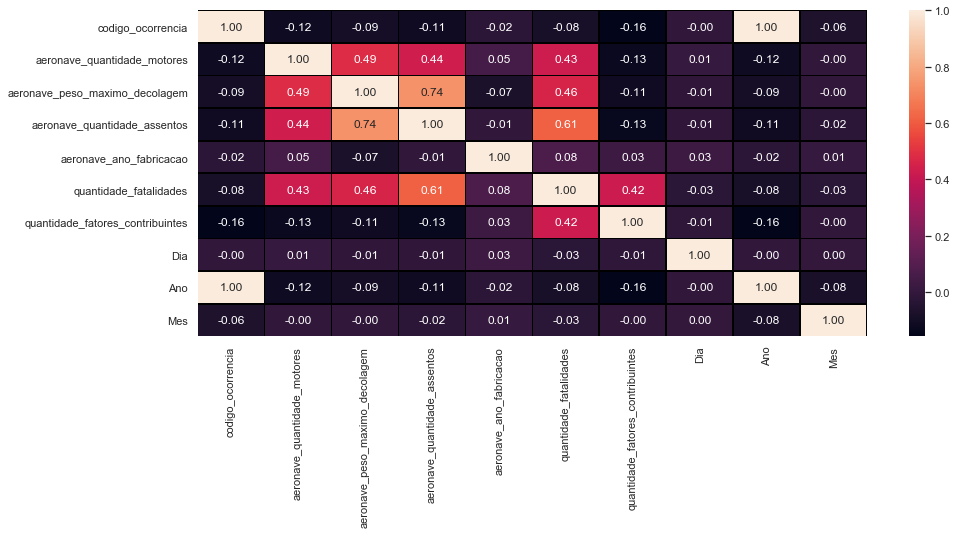

In [47]:
"""Conseguimos observar que existem correlações obvias, como quantidades de assentos e falatalidade, ou quantidade de assentos e número de motos no avião. Com isso não  podemos tirar nenhuma conclusão avançada sobre o assunto."""

f, ax = plt.subplots(figsize=(15,6))
sns.heatmap(avi1.corr(), annot=True, fmt='.2f', ax=ax, linecolor='black', lw=.7)

In [48]:
#Marketshare of the brazilian market.
mshare = flightsT['Companhia.Aerea'].value_counts()
mask = mshare > 100000
mshare2 = mshare[mask]
pd.DataFrame(mshare2)

# summ = mshare.sum()
# minus = mshare2.sum()
# Other = mshare.sum() - minus

,Companhia.Aerea
GOL,759191
AZUL,742495
TAM,554099
AVIANCA BRASIL,183913


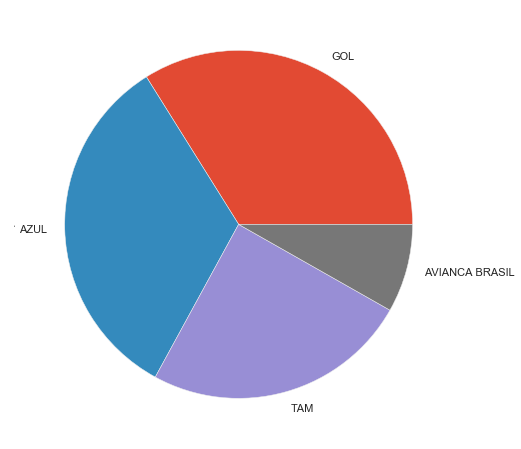

In [68]:
"""As we can see we have few relevant companies in the market."""
mshare2.plot(kind='pie', subplots=True, label="." ,figsize=(8, 8))
plt.savefig("marketshare")

In [79]:
#The number of accidents versus the total number of flights.
gb3 = avi1[['Ano','quantidade_fatalidades']].groupby('Ano').sum()

percent = (gb3.values*100)/sum(total.values)

pd.DataFrame(percent)

total['Accidents'] = gb3.values
total['Accidents Percent'] = percent
total['Accidents'].astype(int)

total['Flights'].sum()
total
total.to_excel("Totalnumbers.xls")  


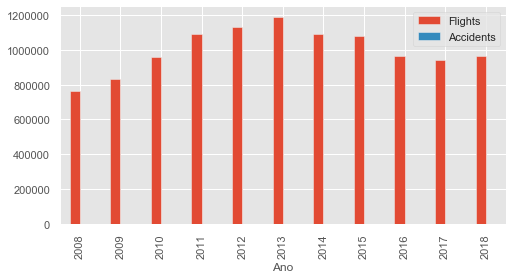

In [72]:
#Total number graph:
"""It´s so small that in a plot bar you can´t see."""
total2 = total.drop('Accidents Percent', axis= 1)
total2

total2.plot.bar(figsize=(8, 4))
plt.savefig('percentacident')

'As you can see in the plot bellow most of the acccidents happens in the southeast of Brazil.'

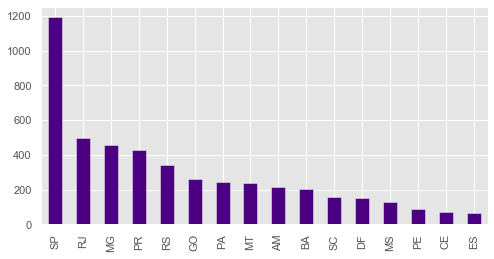

In [91]:
#Finding the cities with the most number of accidents:
mask = avi1['ocorrencia_uf'].value_counts() 
mask2 = mask > 60
mask2
city = mask[mask2]
city

city.plot.bar(color='indigo', figsize=(8, 4))
plt.savefig('accidentsraw')

"""As you can see in the plot bellow most of the acccidents happens in the southeast of Brazil."""

'Waaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaay more people dies in SP.'

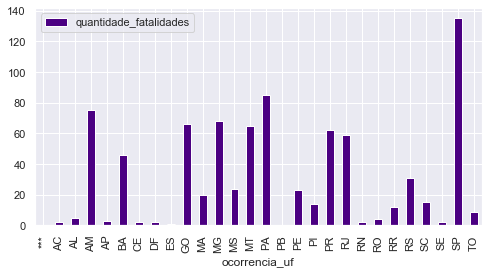

In [53]:
#How many people died in each UF in total.
gb2 = avi1[['ocorrencia_uf','quantidade_fatalidades']].groupby('ocorrencia_uf').sum()
gb2.plot.bar(color='indigo', figsize=(8, 4))


"""Waaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaay more people dies in SP."""

In [54]:
flightR = flightsT['Estado.Origem'].value_counts()
flightR2 = flightR.apply(lambda x: (x*100)/sum(flightR))
flightP = pd.DataFrame(flightR2)   

city2 = city.apply(lambda x: (x*100)/sum(city))
flightP.columns = ['Percentage of flights']

'as you can see there is fewer accidents in SP compared to the percent of the number of flights.'

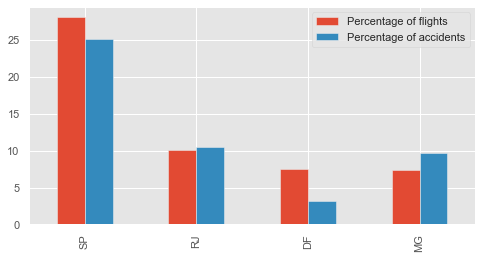

In [92]:
flightP['Percentage of accidents'] = city2
flightP.head(4).plot.bar(figsize=(8, 4))
plt.savefig('accidentsper')

"""as you can see there is fewer accidents in SP compared to the percent of the number of flights."""

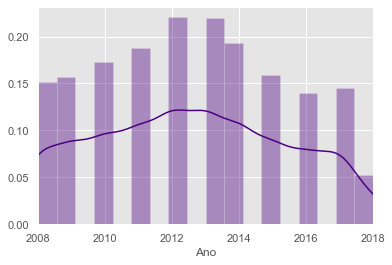

In [90]:
#Number of accidents through the years.
sns.distplot(avi1["Ano"], color='indigo')
plt.xlim([2008,2018])

plt.savefig('accidentsperyear')



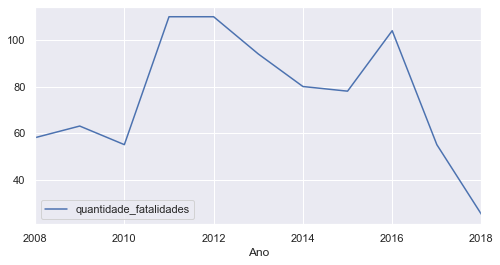

In [57]:
#Number of deaths through the years.
"""We can get to the conclusion that in 2016 a lot of died in fewer accidents (the accidents were bloodier (I don´t know if this word exist))"""
gb2 = avi1[['Ano','quantidade_fatalidades']].groupby('Ano').sum()
gb2.plot(figsize=(8, 4))

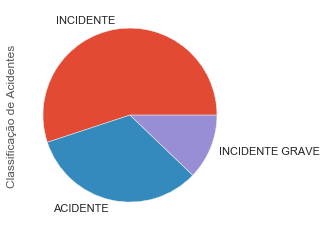

In [100]:
#Category of the accidents.
# Tipos de classificações existentes na base de dados
plt.style.use("ggplot")

#Visualizando melhor em um gráfico
avi1['ocorrencia_classificacao'].value_counts().plot(kind='pie', subplots=True, label="Classificação de Acidentes" )
plt.savefig('grav')


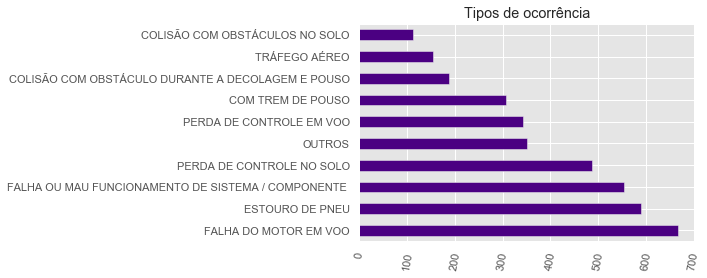

In [101]:
#The most frequent kinds of accidents.
plt.style.use("ggplot")
a = avi1['ocorrencia_tipo'].value_counts()
a.head(10).plot(kind='barh', subplots=True, label="Tipos de ocorrência" , color='indigo')
plt.xticks(rotation=80)
"""Como podemos ver, falha do motor em voo é a principal ocorrência."""
plt.savefig('tipo')


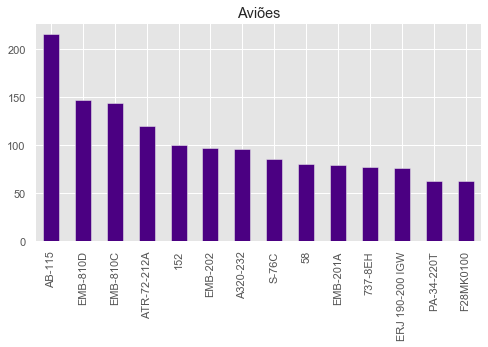

In [114]:
#Model and manifacture of planes that suffered the most number of accidents:
avi1['aeronave_modelo'].value_counts()
con = avi1[['aeronave_modelo','aeronave_fabricante']].groupby('aeronave_modelo').sum()
pd.DataFrame(con)

mask6 = avi1['aeronave_modelo'].value_counts() 
mask7 = mask6 > 60

model = mask6[mask7]
pd.DataFrame(model)
model.columns = 'Numero de acidentes'
model.plot.bar( subplots=True, label="Aviões" ,figsize=(8, 4), color='indigo')
plt.savefig('Avi')


In [61]:
gb = avi1[['aeronave_modelo','aeronave_quantidade_assentos']].groupby('aeronave_modelo').mean()


In [62]:
#Manufacture of the models that fall the most.
model['aeronave_modelo'] = model.index

result = con.merge(model, how='right', left_on="aeronave_modelo", right_index=True)
result.columns = 'Fabricante', 'Acidentes'

result

,Fabricante,Acidentes
aeronave_modelo,,
152,CESSNA AIRCRAFTCESSNA AIRCRAFTCESSNA AIRCRAFTC...,100
58,BEECH AIRCRAFTBEECH AIRCRAFTBEECH AIRCRAFTBEEC...,80
737-8EH,BOEING COMPANYBOEING COMPANYBOEING COMPANYBOEI...,77
A320-232,AIRBUS INDUSTRIEAIRBUS INDUSTRIEAIRBUS INDUSTR...,96
AB-115,AERO BOEROAERO BOEROAERO BOEROAERO BOEROAERO B...,216
ATR-72-212A,AEROSPATIALE AND ALENIAAEROSPATIALE AND ALENIA...,120
EMB-201A,NEIVA INDUSTRIA AERONAUTICANEIVA INDUSTRIA AER...,79
EMB-202,NEIVA INDUSTRIA AERONAUTICANEIVA INDUSTRIA AER...,97
EMB-810C,EMBRAEREMBRAEREMBRAEREMBRAEREMBRAEREMBRAEREMBR...,144


'Don´t fly in Cessna Aircraft.'

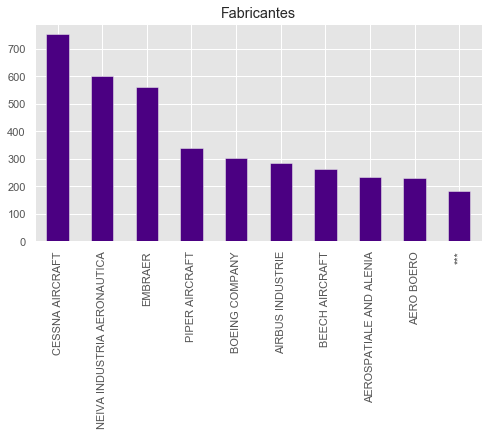

In [188]:
#Manufacture of the models that fall the most (Now in a plot).

fabricantes = avi1['aeronave_fabricante'].value_counts().head(10)
fabricantes.plot.bar(subplots=True, label="Fabricantes" ,figsize=(8, 4), color='indigo')
plt.savefig('fabi')

"""Don´t fly in Cessna Aircraft."""

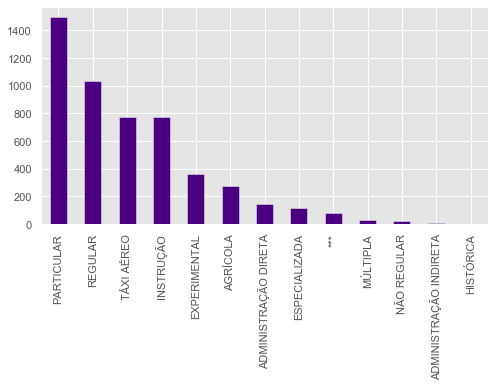

In [105]:
#Category that has most accidents.
kind = avi1['aeronave_segmento_aviacao'].value_counts()
kind.plot.bar(color='indigo', figsize=(8, 4))
plt.savefig('tipo')


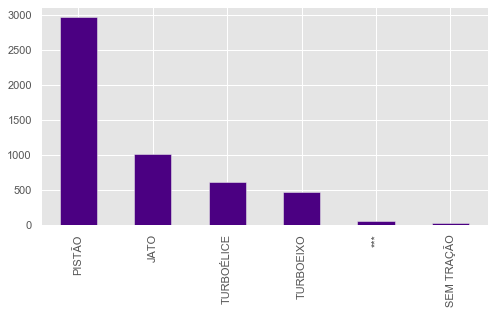

In [104]:
#Kind of engine that falls the most.
tipo_motor = avi1['aeronave_tipo_motor'].value_counts()
tipo_motor.plot.bar(color='indigo', figsize=(8, 4))
plt.savefig('prob')


# Stuff that I didn´t use but I might need someday.

In [66]:
# #Getting the mean number of seats of the planes above.
# means = []
# seats = []
# for i in model.index:
#     seats.append(i)
  


# # for i in seats:
#        means.append(gb.loc[i])

# meansseats = pd.DataFrame(means)
# #Creating a function to transform from list to dictionary 
# #Yes, I know I could use lambda, but it didn´t worked, so I thought working is better than not working.
# """This means that smaller aircrafts have a bigger chance of suffer a accident"""

# # meansseats.plot.bar()